In [1]:
# import libraries and packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Remove display restrictions
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None) 

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
student_df = pd.read_excel('/Users/udoychowdhury/Documents/Assitantship/Full Conditionally Admitted Students.xlsx')

In [3]:
student_df['success_by_gpa'] = (student_df['Overall_GPA'] >= 3.0).astype(int)
display(student_df.head(5)) 

,ID,Term_Code,Gender,Ethnicity,Citizenship_Ind,State,County,County_Desc,Total_Credit_Hours,STYP_Code,Program_x,Secondary_Program,Level,Major_x,Major_2,Minor_1,Minor_2,ADMT_Code,Admit_Desc,Concentration_x,Admit_Term,Term_GPA,Overall_GPA,Inst_Hours_Attempted,Inst_Hours_Earned,Overall_Hours_Attempted,Overall_Hours_Earned,Prev_ASTD_Code_EOT,ASTD_Code_EOT,ASTD_Code_Override,Enrollment_Add_Date,CRN,Subject,Course,Section,Credit_Hours,Title,Grade,Final_Grade,Campus,Instructional_Method,SCHD_Code,Housing_x,RESD_Code,3S_Ind,All_Sports,Math_Readiness_Ind,Veteran_Ind,SPRADDR_CNTY_CODE,SARADAP_STYP_CODE_2,SPRADDR_STAT_CODE,SARADAP_ADMT_CODE,ETHNICITY,SARAPPD_APDC_CODE,SARAPPD_APDC_DATE,AGE,HS_NAME,HS_CITY,HS_STATE,HS_COUNTY,HS_LAT,HS_LONG,SPBPERS_SEX,SAT_MATH,SAT_ERBW,SAT_TOTAL,ACT_COMPOSITE,DCHS_IND,REC_TEST_PLAN,HOUSING_INTEREST,FIRST_GEN_IND,PCKG_GROUP_IND,HOUS_DEP_PAID,FAFSA_IND,REC_EOF_LOCATION,REC_COUNTRY_OF_ORIG,REC_COMPLETED_DATE,E04,Registration Status,Admissions Status,Matriculation Status,Attendance Status,Class Level,Total Credits Enrolled,School,Program_y,Degree,Maj_Acronym,Major_y,Major_Desc_y,Program.1,Concentration_y,Housing_y,BannerTerm,Residency,success_by_gpa
0,127060,202280,F,Hispanic or Latino,Y,NJ,1,Atlantic,16,F,BIOL-BS,Null,U,BIOL,Null,Null,Null,FR,First-Time UG,GENE,202280,2.65,2.52,20,20,20,20,Null,GS,Null,2022-07-20 13:54:59,81958,FRST,1101,34,4,COLLEGE WRITING,B+,B+,RSC,LEC,F2F,Null,R,Null,Null,Y,Null,1,F,NJ,FR,Hispanic or Latino,IE,2022-05-05,18,ATLANTIC COUNTY INST OF TECH,MAYS LANDING,NJ,Atlantic,39.4704,-74.4522,F,0,0,0,0,Y,I will NOT submit SAT or ACT scores,N,Null,UGWPN,N,Y,Null,Null,2022-04-08,Female,Continuing,Regular,Degree-Seeking,FT,First-Year,16,HLTH,HLTH-BS,BS,HLSC,HLSC,Health Science,HLTH-BS,GENE,Null,202320,R,0
1,127060,202280,F,Hispanic or Latino,Y,NJ,1,Atlantic,16,F,BIOL-BS,Null,U,BIOL,Null,Null,Null,FR,First-Time UG,GENE,202280,2.65,2.52,20,20,20,20,Null,GS,Null,2022-07-20 13:54:59,80288,GAH,2171,1,4,HUMAN CONFLICT,B-,B-,RSC,LEC,F2F,Null,R,Null,Null,Y,Null,1,F,NJ,FR,Hispanic or Latino,IE,2022-05-05,18,ATLANTIC COUNTY INST OF TECH,MAYS LANDING,NJ,Atlantic,39.4704,-74.4522,F,0,0,0,0,Y,I will NOT submit SAT or ACT scores,N,Null,UGWPN,N,Y,Null,Null,2022-04-08,Female,Continuing,Regular,Degree-Seeking,FT,First-Year,16,HLTH,HLTH-BS,BS,HLSC,HLSC,Health Science,HLTH-BS,GENE,Null,202320,R,0
2,127060,202280,F,Hispanic or Latino,Y,NJ,1,Atlantic,16,F,BIOL-BS,Null,U,BIOL,Null,Null,Null,FR,First-Time UG,GENE,202280,2.65,2.52,20,20,20,20,Null,GS,Null,2022-07-20 13:54:59,80828,GNM,1126,3,4,INTERMEDIATE ALGEBRA,B+,B+,RSC,LEC,F2F,Null,R,Null,Null,Y,Null,1,F,NJ,FR,Hispanic or Latino,IE,2022-05-05,18,ATLANTIC COUNTY INST OF TECH,MAYS LANDING,NJ,Atlantic,39.4704,-74.4522,F,0,0,0,0,Y,I will NOT submit SAT or ACT scores,N,Null,UGWPN,N,Y,Null,Null,2022-04-08,Female,Continuing,Regular,Degree-Seeking,FT,First-Year,16,HLTH,HLTH-BS,BS,HLSC,HLSC,Health Science,HLTH-BS,GENE,Null,202320,R,0
3,127060,202280,F,Hispanic or Latino,Y,NJ,1,Atlantic,16,F,BIOL-BS,Null,U,BIOL,Null,Null,Null,FR,First-Time UG,GENE,202280,2.65,2.52,20,20,20,20,Null,GS,Null,2022-07-20 13:54:59,81648,GSS,2161,1,4,PERSPECTIVES ON SEXUALITY,D+,D+,RSC,LEC,F2F,Null,R,Null,Null,Y,Null,1,F,NJ,FR,Hispanic or Latino,IE,2022-05-05,18,ATLANTIC COUNTY INST OF TECH,MAYS LANDING,NJ,Atlantic,39.4704,-74.4522,F,0,0,0,0,Y,I will NOT submit SAT or ACT scores,N,Null,UGWPN,N,Y,Null,Null,2022-04-08,Female,Continuing,Regular,Degree-Seeking,FT,First-Year,16,HLTH,HLTH-BS,BS,HLSC,HLSC,Health Science,HLTH-BS,GENE,Null,202320,R,0
4,127065,202280,F,Hispanic or Latino,Y,NJ,1,Atlantic,20,F,HLTH-BS,Null,U,HLSC,Null,Null,Null,FR,First-Time UG,COND,202280,2.14,2.53,28,24,28,24,Null,GS,Null,2022-07-20 13:23:38,80160,FRST,1100,5,4,DEVELOPMENTAL MATHEMATICS,C,C,RSC,LEC,F2F,Null,R,Null,Null,N,Null,1,F,NJ,FR,Hispanic or Latino,IE,2022-02-25,18,ATLANTIC COUNTY INST OF TECH,MAYS LANDING,NJ,Atlantic,39.4704,-74.4522,F,0,0,0,0,Y,I will NOT submit SAT or ACT scores,N,Null,UGWPN,N,Y,Null,Null,2022

In [4]:
count_3_or_above = student_df.loc[student_df['Overall_GPA'] >= 3.0].shape[0]
print(f"Number of students with GPA 3.0 or above: {count_3_or_above}")


Number of students with GPA 3.0 or above: 906


In [5]:
# check data types for each column
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 96 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1458 non-null   int64         
 1   Term_Code                1458 non-null   int64         
 2   Gender                   1458 non-null   object        
 3   Ethnicity                1458 non-null   object        
 4   Citizenship_Ind          1458 non-null   object        
 5   State                    1458 non-null   object        
 6   County                   1458 non-null   int64         
 7   County_Desc              1458 non-null   object        
 8   Total_Credit_Hours       1458 non-null   int64         
 9   STYP_Code                1458 non-null   object        
 10  Program_x                1458 non-null   object        
 11  Secondary_Program        1458 non-null   object        
 12  Level                    1458 non-

In [6]:
# subset numerical columns from categorical
num_cols = pd.DataFrame(student_df[student_df.select_dtypes(include = ['float', 'int']).columns])

In [7]:
num_cols.head()

,ID,Term_Code,County,Total_Credit_Hours,Admit_Term,Term_GPA,Overall_GPA,Inst_Hours_Attempted,Inst_Hours_Earned,Overall_Hours_Attempted,Overall_Hours_Earned,CRN,Course,Section,Credit_Hours,SPRADDR_CNTY_CODE,AGE,HS_LAT,HS_LONG,SAT_MATH,SAT_ERBW,SAT_TOTAL,ACT_COMPOSITE,Total Credits Enrolled,BannerTerm,success_by_gpa
0,127060,202280,1,16,202280,2.65,2.52,20,20,20,20,81958,1101,34,4,1,18,39.4704,-74.4522,0,0,0,0,16,202320,0
1,127060,202280,1,16,202280,2.65,2.52,20,20,20,20,80288,2171,1,4,1,18,39.4704,-74.4522,0,0,0,0,16,202320,0
2,127060,202280,1,16,202280,2.65,2.52,20,20,20,20,80828,1126,3,4,1,18,39.4704,-74.4522,0,0,0,0,16,202320,0
3,127060,202280,1,16,202280,2.65,2.52,20,20,20,20,81648,2161,1,4,1,18,39.4704,-74.4522,0,0,0,0,16,202320,0
4,127065,202280,1,20,202280,2.14,2.53,28,24,28,24,80160,1100,5,4,1,18,39.4704,-74.4522,0,0,0,0,12,202320,0


In [8]:
# summary descriptive statistics for students with not good GPA
student_df[student_df['success_by_gpa'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,552.0,131440.396739,831.130230,127060.0000,131076.5000,131489.5000,131943.0000,132733.0000
Term_Code,552.0,202280.000000,0.000000,202280.0000,202280.0000,202280.0000,202280.0000,202280.0000
County,552.0,14.923913,15.925006,1.0000,1.0000,11.0000,23.5000,99.0000
Total_Credit_Hours,552.0,15.882246,1.693023,12.0000,16.0000,16.0000,16.0000,20.0000
Admit_Term,552.0,202280.000000,0.000000,202280.0000,202280.0000,202280.0000,202280.0000,202280.0000
Term_GPA,552.0,1.952808,0.825505,0.0000,1.4300,2.1000,2.6700,2.9800
Overall_GPA,552.0,2.022355,0.799240,0.0000,1.5700,2.2050,2.6700,2.9800
Inst_Hours_Attempted,552.0,16.788043,2.500164,12.0000,16.0000,16.0000,18.0000,28.0000
Inst_Hours_Earned,552.0,12.829710,5.380612,0.0000,8.0000,14.0000,16.0000,24.0000
Overall_Hours_Attempted,552.0,19.403986,11.211618,12.0000,16.0000,16.0000,20.0000,80.0000


In [9]:
# summary descriptive statistics for students with good GPA
student_df[student_df['success_by_gpa'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,906.0,131404.024283,841.026670,127087.0000,131002.0000,131478.0000,131994.0000,132719.0000
Term_Code,906.0,202280.000000,0.000000,202280.0000,202280.0000,202280.0000,202280.0000,202280.0000
County,906.0,16.203091,21.665989,1.0000,1.0000,7.0000,25.0000,99.0000
Total_Credit_Hours,906.0,16.083885,1.184441,12.0000,16.0000,16.0000,16.0000,21.0000
Admit_Term,906.0,202280.000000,0.000000,202280.0000,202280.0000,202280.0000,202280.0000,202280.0000
Term_GPA,906.0,3.521170,0.319037,2.7500,3.2500,3.5100,3.8300,4.0000
Overall_GPA,906.0,3.534238,0.300665,3.0000,3.2500,3.5550,3.8300,4.0000
Inst_Hours_Attempted,906.0,17.392936,3.522950,12.0000,16.0000,16.0000,17.7500,46.0000
Inst_Hours_Earned,906.0,17.012141,3.582781,12.0000,16.0000,16.0000,17.0000,42.0000
Overall_Hours_Attempted,906.0,21.864238,11.772348,12.0000,16.0000,16.0000,21.0000,81.0000


In [247]:
num_cols_hist = num_cols.drop(['success_by_gpa'], axis=1)
num_cols_hist = num_cols_hist.drop(['Overall_GPA'], axis=1)
num_cols_hist = num_cols_hist.drop(['Term_GPA'], axis=1)
num_cols_hist = num_cols_hist.drop(['ID'], axis=1)
num_cols_hist = num_cols_hist.drop(['HS_LAT'], axis=1)
num_cols_hist = num_cols_hist.drop(['HS_LONG'], axis=1)
num_cols_hist = num_cols_hist.drop(['SPRADDR_CNTY_CODE'], axis=1)
num_cols_hist = num_cols_hist.drop(['Term_Code'], axis=1)
num_cols_hist = num_cols_hist.drop(['Section'], axis=1)
num_cols_hist = num_cols_hist.drop(['Admit_Term'], axis=1)
num_cols_hist = num_cols_hist.drop(['County'], axis=1)
num_cols_hist = num_cols_hist.drop(['BannerTerm'], axis=1)
num_cols_hist = num_cols_hist.drop(['Credit_Hours'], axis=1)
num_cols_hist = num_cols_hist.drop(['SAT_ERBW'], axis=1)
num_cols_hist = num_cols_hist.drop(['SAT_TOTAL'], axis=1)
num_cols_hist = num_cols_hist.drop(['CRN'], axis=1)
num_cols_hist = num_cols_hist.drop(['Inst_Hours_Attempted'], axis=1)
num_cols_hist

,Total_Credit_Hours,Inst_Hours_Earned,Overall_Hours_Attempted,Overall_Hours_Earned,Course,AGE,SAT_MATH,ACT_COMPOSITE,Total Credits Enrolled
0,16,20,20,20,1101,18,0,0,16
1,16,20,20,20,2171,18,0,0,16
2,16,20,20,20,1126,18,0,0,16
3,16,20,20,20,2161,18,0,0,16
4,20,24,28,24,1100,18,0,0,12
...,...,...,...,...,...,...,...,...,...
1453,16,16,25,25,2121,18,510,0,13
1454,17,8,17,8,1245,19,650,0,14
1455,17,8,17,8,3113,19,650,0,14
1456,17,8,17,8,2215,19,650,0,14


In [248]:
# Scale numeric variables
sc = StandardScaler()
num_cols_scaled = pd.DataFrame(sc.fit_transform(num_cols_hist), columns = num_cols_hist.columns)

In [249]:
# List of columns to select
columns_to_select = [
    'Ethnicity',
    # 'Gender',
    'Major_x',
    # 'Matriculation Status',
    'Instructional_Method',
    'Math_Readiness_Ind',
    # 'Housing_y',
    # 'Attendance Status',
    'FIRST_GEN_IND'
]

# Selecting the specified columns from the original DataFrame
cat_cols = student_df[columns_to_select]
unique_values = cat_cols.nunique()

print(unique_values)

Ethnicity                8
Major_x                 20
Instructional_Method     9
Math_Readiness_Ind       2
FIRST_GEN_IND           10
dtype: int64


In [250]:
# one hot encode the categorical variables
encoded_cat_cols = pd.get_dummies(cat_cols)


# resex index for both numerical scaled and encoded categorical so additional rows are not introduced after concatenation
num_cols_scaled.reset_index(drop=True, inplace=True)
encoded_cat_cols.reset_index(drop=True, inplace=True)

# concat the numerical and one hot encoded variables
student_df_new = pd.concat([num_cols_scaled, encoded_cat_cols], axis = 1)

In [251]:
# check percentage of records where students have good GPA
student_df.loc[:, 'success_by_gpa'].sum() / student_df.shape[0] * 100

62.139917695473244

In [252]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report, f1_score

# split target/features into two separate datasets. Split into train/test 
target = student_df['success_by_gpa']
features = student_df_new

# split the data into training and test sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, target, random_state = 42, test_size = 0.25)

# address class imbalance using SMOTE
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [253]:
print(f"The train dataset (no resampling) has: {len(y_train)}")
print(f'The train dataset (Random Resampling) has: {len(X_train_ros)}')
print(f'The test dataset has: {len(y_test)}')

The train dataset (no resampling) has: 1093
The train dataset (Random Resampling) has: 1358
The test dataset has: 365


In [254]:
# create model function - the train and test datasets will be the same for all models
def model_assess(model, name = "Default"): 
  model.fit(x_train, y_train)
  preds = model.predict(x_test)
  preds_proba = model.predict(x_test)

  print(classification_report(y_test, model.predict(x_test)))

In [255]:
# logistic regression performance with scaled data
lg = LogisticRegression(random_state=42)
model_assess(lg, 'Logistic Regression')

# Precision:
# Indicates the accuracy of the positive predictions. 

# Recall:
# Measures the proportion of actual positives that are correctly identified. 

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       138
           1       0.82      0.91      0.86       227

    accuracy                           0.82       365
   macro avg       0.82      0.79      0.80       365
weighted avg       0.82      0.82      0.82       365



Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

F1 Score: 0.8637316561844863


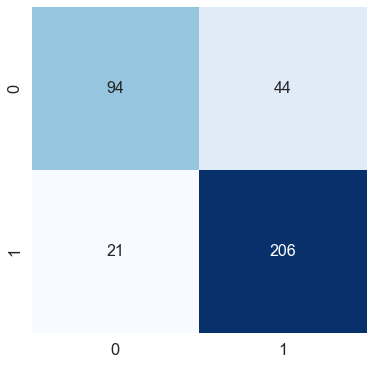

In [256]:
# confusion matrix
cm = confusion_matrix(y_test, lg.predict(x_test))

plt.figure(figsize=(6,6))
sns.set(font_scale=1.5) 
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False);

f1_test = f1_score(y_test, lg.predict(x_test))
print(f'F1 Score: {f1_test}')

# F1 Score
# - harmonic mean of precision and recall
# - a measure of the model's accuracy on the positive class. 
# - 0.9848,suggests the model has a strong performance in identifying students with a GPA equal to or above 3.

# TN, top-left
#     Correctly predicted the negative class (GPA below 3).
# FP, top-right
#     Incorrectly predicted the positive class (GPA of 3 or above) when the actual was negative.
# FN, bottom-left
#     Incorrectly predicted the negative class when the actual was positive.
# (TP, bottom-right
#     Crrectly predicted the positive class.
